---
title: "Seaborn | 데이터프레임 친화적 패키지"
author: "강신성"
date: "2023-10-08"
date-format: iso
image: "https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png"
categories: [seaborn]
---

> `seaborn`을 이용하여 그래프를 그려보자!

## 1. 라이브러리 import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. ```Seaborn```과 `Matplotlib`

* ```matplotlib``` : 벡터 친화적
* ```seaborn``` : 데이터프레임 친화적

> 분석할 데이터가 태뷸러데이터 형식인 경우가 많다.
>
> matplotlib는 여전히 강력하지만, seaborn등 데이터프레임 친화적인 패키지가 우수한 경우가 많다.

### **A. scatter plot**
---

In [3]:
## titanic data
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2023/main/posts/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,logFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.266662
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.070022
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.972177
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.085672


<Axes: xlabel='logFare', ylabel='Age'>

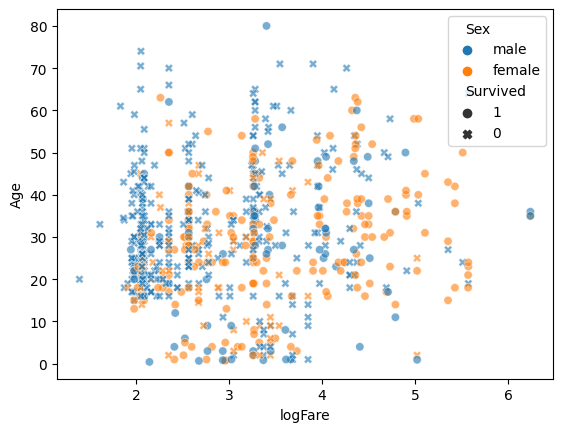

In [14]:
sns.scatterplot(
    df,
    x = 'logFare',  ## 요금에 로그를 취한 값(너무 변동이 크니까)
    y = 'Age',
    hue = 'Sex',    ## 색상, 색조. 변수 별 색상을 나눠 표기한다.
    style = 'Survived', style_order = [1,0],  ## Survived 여부로 마커 표시, style_order의 디폴트 값이 [0 => O,1 => X]이므로 그 순서를 변경
    alpha = 0.6     ## 투명도 조절
)

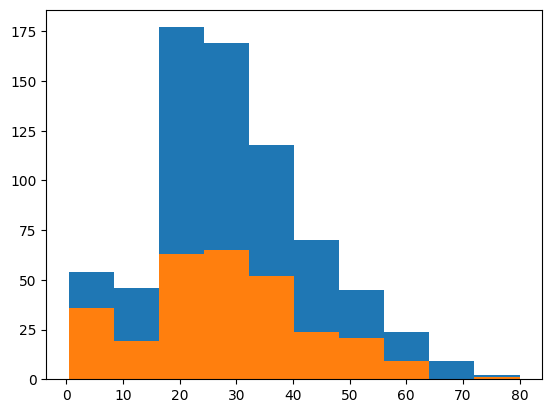

In [18]:
plt.hist(df.Age)
plt.hist(df.Age[df.Survived == 1])  ## 그냥 그리면 겹쳐짐

plt.show()

```-``` ```seaborn```은 데이터과학에서 거의 표준적인 패키지.
* 안하는 이유
  * 간단한 시각화는 matplotlib가 유리
  * seaborn에 대한 고급기능은 matplotlib에 대한 통찰이 있어야 가능
  * plotline이 더 우수함(ggplot2)
  * plotly가 모든 면에서 seaborn을 압도하는 추세임

### **B. seaborn**의 고급기능 이해

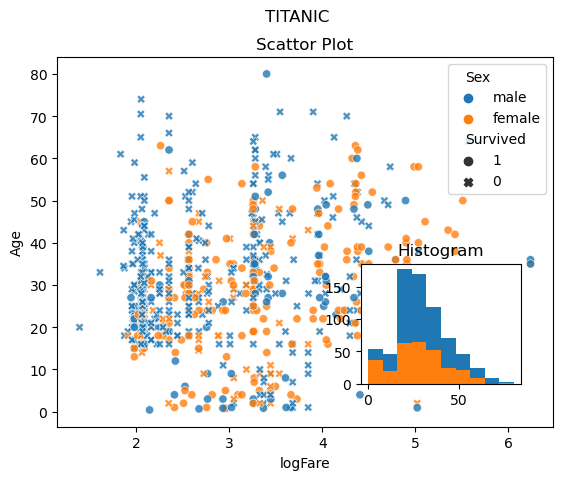

In [6]:
sns.scatterplot(
    df,
    x = 'logFare',
    y = 'Age',
    hue = 'Sex',
    style = 'Survived', style_order = [1,0],
    alpha = 0.8
)

fig = plt.gcf()
ax = plt.gca()
ax.set_title('Scattor Plot')

fig.add_axes([0.6,0.2,0.25,0.25])
ax_mini = plt.gca()
## ax_mini = fig.add_axes([0.6,0.2,0.25,0.25])과 동일

ax_mini.hist(df.Age)
ax_mini.hist(df.Age[df.Survived == 1])
ax_mini.set_title('Histogram')
fig.suptitle('TITANIC')

plt.show()

In [8]:
type(fig) ## seaborn으로 제작하였음에도 Figure의 형식을 지닌다.

matplotlib.figure.Figure

## 3. 훌륭한 시각화

### **애드워드 터프티**
---

\- 데이터 시각화계의 거장

- 엄격한 미니멀리즘
 * 최소한의 잉크로 많은 정보를 전달할 수 있다면 그것이 바로 좋은 그래프이다.

 > 너무 구시대적인 사고일 수도 있음. 적합할 수도 있고.

### **찰스미나드의 도표**
---

![](https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png)

> 터프티도 극찬하고 ~중국이 놀라고, 일본이 경악하고...~


* 군대의 크기, 2차원 평면상의 위치, 군대의 이동방향, 모스크바에서 퇴각하는 동안의 여러 날짜와 그 시점에서의 온도 -> 6차원의 변수를 한 평면상에 표현

미나드는 여러 그림을 그리는 방법 대신에 한 그림에서 패널을 늘리는 방법을 선택함.

## 4. 미나드처럼 그리는 게 왜 어려운가?

```-``` 몸무게, 키, 성별, 국적을 나타내는 자료

In [29]:
df1=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/male1.csv')   ## 남성의 키
df2=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/male2.csv')   ## 남성의 몸무게
df3=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/female.csv')  ## 여성의 키와 몸무게
df4=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/foreign.csv') ## 외국인의 키와 몸무게, 성별, 국적

In [31]:
_df = pd.concat([pd.concat([df1,df2],axis=1)\
                 .assign(g='m'),df3.assign(g='f')])
df = pd.concat([_df.assign(g2='korea'),df4.assign(g2='foreign')])\
.reset_index(drop=True)
df

,w,h,g,g2
0,72.788217,183.486773,m,korea
1,66.606430,173.599877,m,korea
2,69.806324,173.237903,m,korea
3,67.449439,173.223805,m,korea
4,70.463183,174.931946,m,korea
...,...,...,...,...
1525,78.154632,188.324350,m,foreign
1526,74.754308,183.017979,f,foreign
1527,91.196208,190.100456,m,foreign
1528,87.770394,187.987255,m,foreign


<Axes: xlabel='w', ylabel='h'>

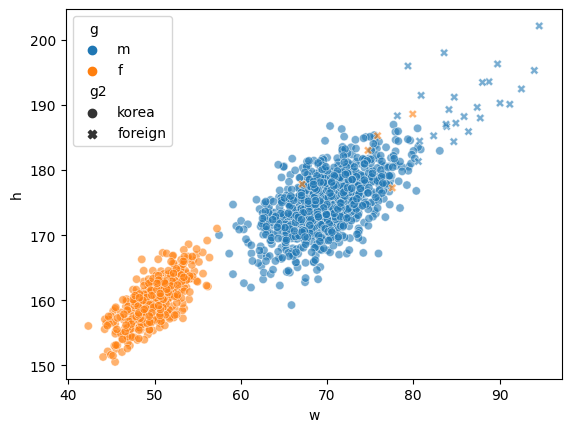

In [34]:
sns.scatterplot(
    data=df,
    x='w',
    y='h',
    hue='g',    ## group 1 : gender
    style='g2',  ## group 2 : region
    alpha=0.6
)

> 그래프를 이해하기 어려운 것은 아니지만, 아무래도 난잡한 것은 사실이다.

```-```어려운 점 :

  1. 센스 부족 : 센스가 없어서 그룹 구분할 생각을 못함
  2. 개념 부족 : 타이디데이터( =tidy dataframe, long form dataframe) 형태로 데이터를 정리할 생각을 못함.
  3. 코딩 못함 : 타이디테이터로 데이터를 변형하는 코드를 모름.